### Bigmart Data Sales- Technocolabs

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv(r"C:\Users\MD.IRSHAD\OneDrive\Desktop\Intern Technocolabs\Data sets\Train.csv")
test  = pd.read_csv(r"C:\Users\MD.IRSHAD\OneDrive\Desktop\Intern Technocolabs\Data sets\Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


### Data Structure and Content

In [6]:
# Display basic information about the dataset

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [7]:
# Display summary statistics for numerical columns

print(train.describe())
print(test.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
       Item_Weight  Item_Visibility     Item_

In [8]:
# Check for missing values

print(train.isnull().sum())
print(test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [9]:
#missing values in descending order

print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n",train.isnull().sum()/train.shape[0] *100,"\n\n")
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n",test.isnull().sum()/test.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

In [10]:
print("Outlet_Size:\n", train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [11]:
print("test mode, train mode\n",[train['Outlet_Size'].mode().values[0], test['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [12]:
#train
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode().values[0])
#test
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode().values[0])
#checking if we filled missing values
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

### EDA

In [13]:
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()
#numeric df
BM_num = train[num]
#categoric df
BM_cat = train[cat]
#print(num)
#print(cat)
[train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [14]:
#train
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
 ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
 ['Low Fat','Low Fat','Regular'],inplace = True)
#check result
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
#creating our new column for both datasets
train['Outlet_Age'], test['Outlet_Age'] = train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
##uncomment to check result
train['Outlet_Age'].head()
test['Outlet_Age'].head()

0    21
1    13
2    22
3    13
4    35
Name: Outlet_Age, dtype: int64

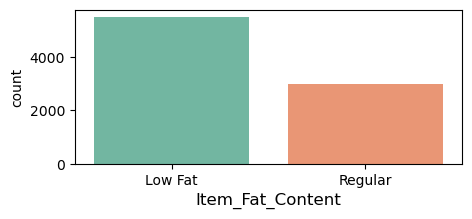

In [16]:
plt.figure(figsize=(5, 2))
sns.countplot(x='Item_Fat_Content', data=train, palette='Set2')  # Change 'Set2' to your desired palette
plt.xlabel('Item_Fat_Content', fontsize=12)
plt.show()

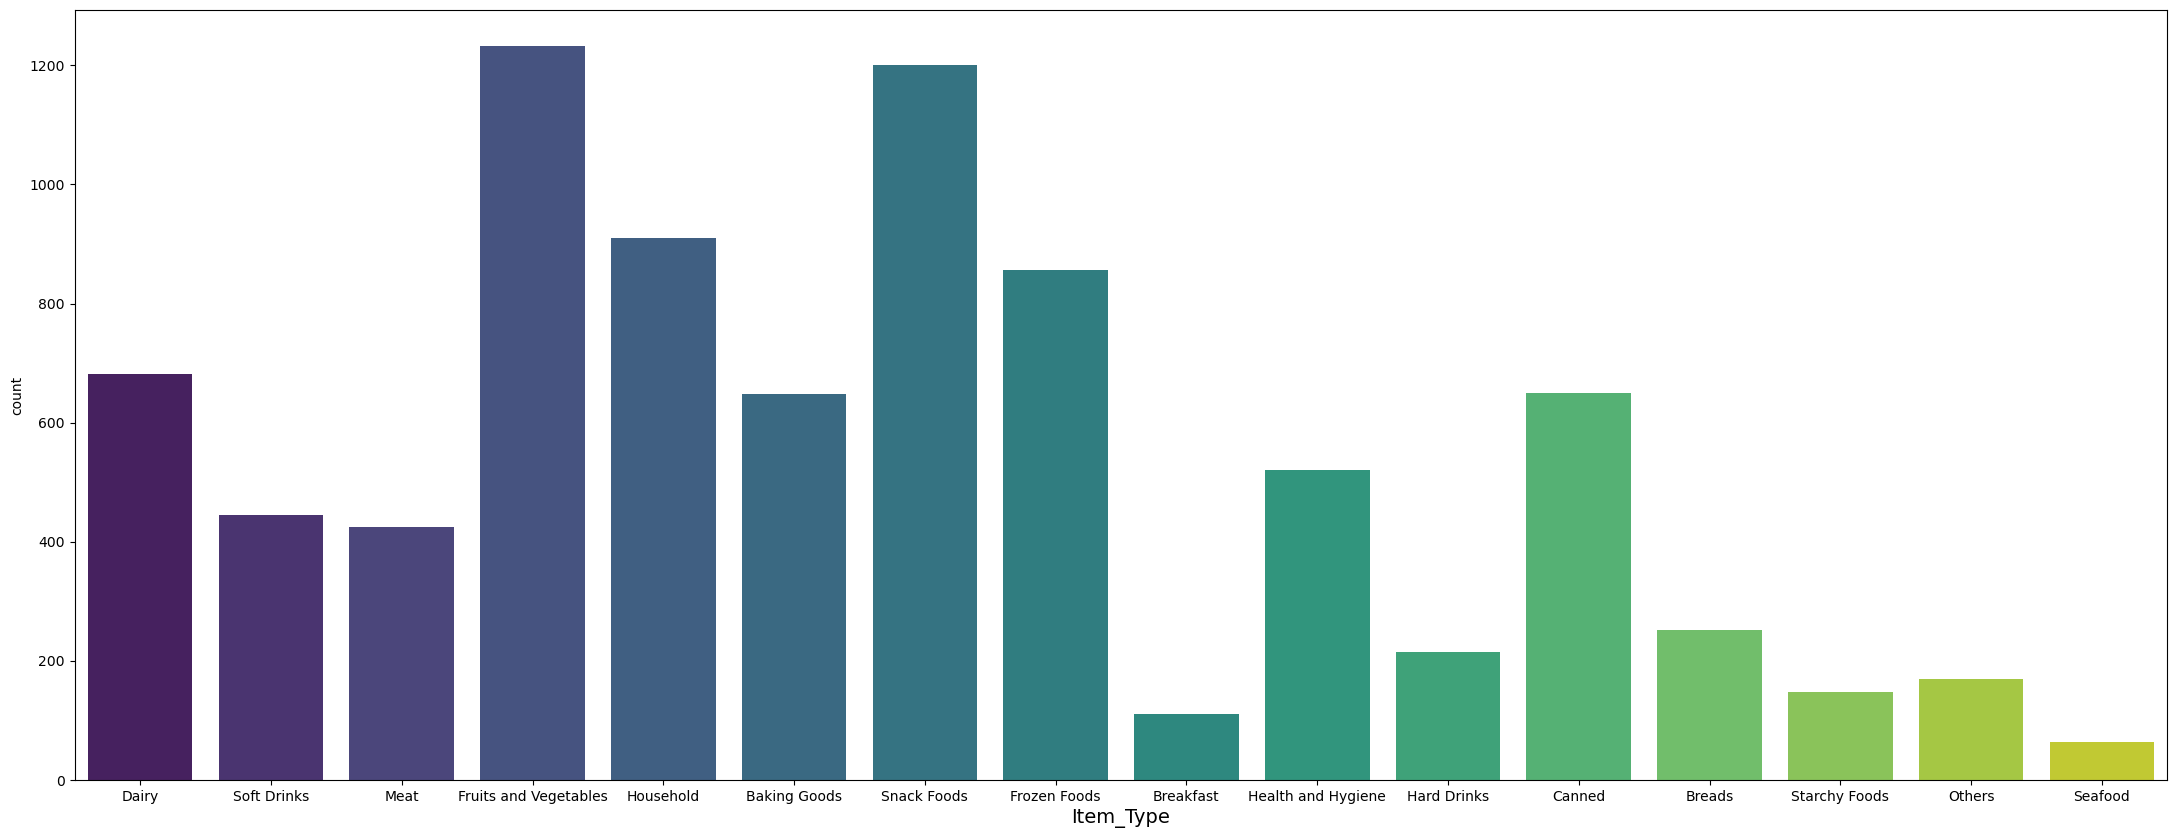

In [17]:
plt.figure(figsize=(27, 10))
sns.countplot(x='Item_Type', data=train, palette='viridis')  # Change 'viridis' to your desired palette
plt.xlabel('Item_Type', fontsize=14)
plt.show()

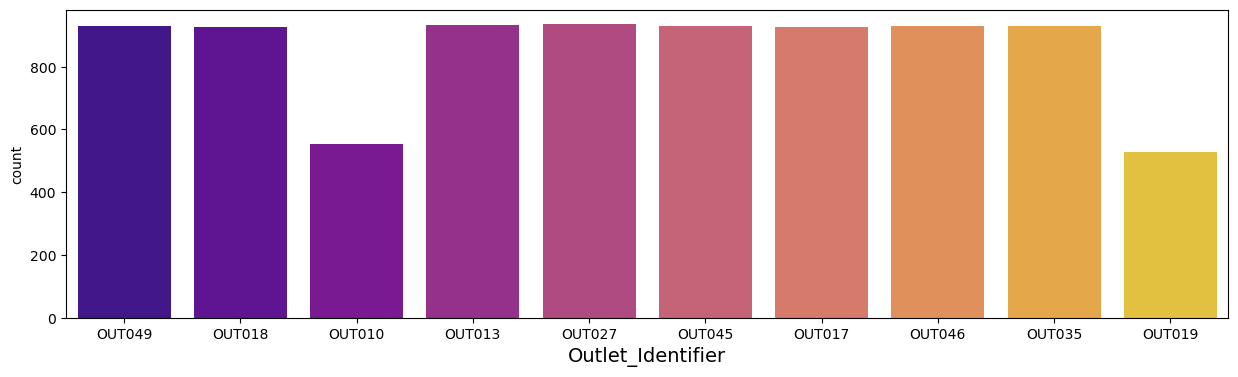

In [18]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Outlet_Identifier', data=train, palette='plasma')  # Change 'plasma' to your desired palette
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

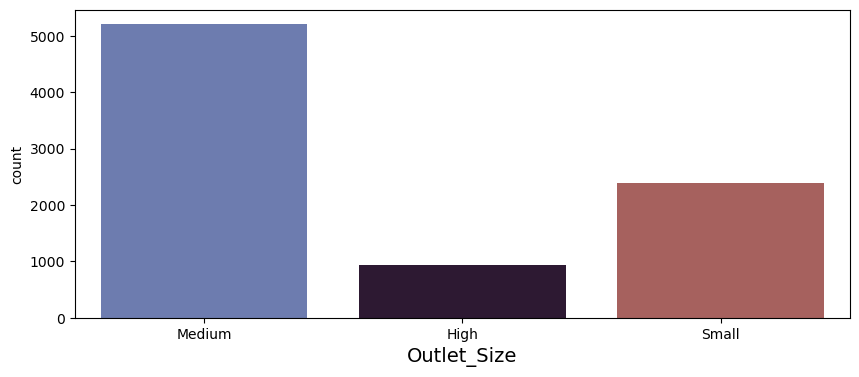

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Outlet_Size', data=train, palette='twilight')  # Change 'twilight' to your desired palette
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

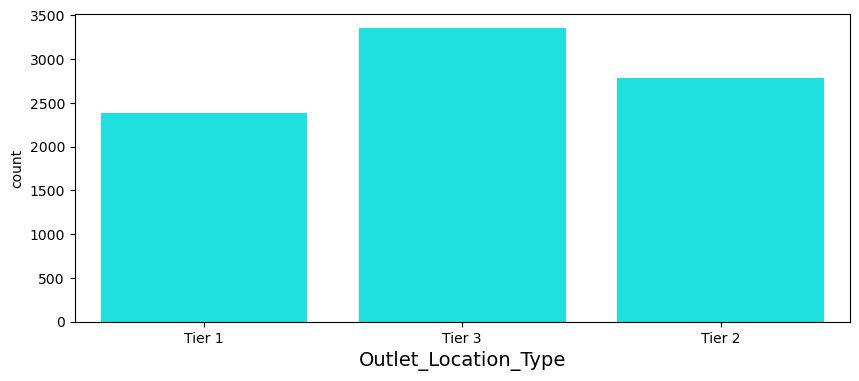

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Outlet_Location_Type', data=train, color='cyan')  # Change 'cyan' to your desired color
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

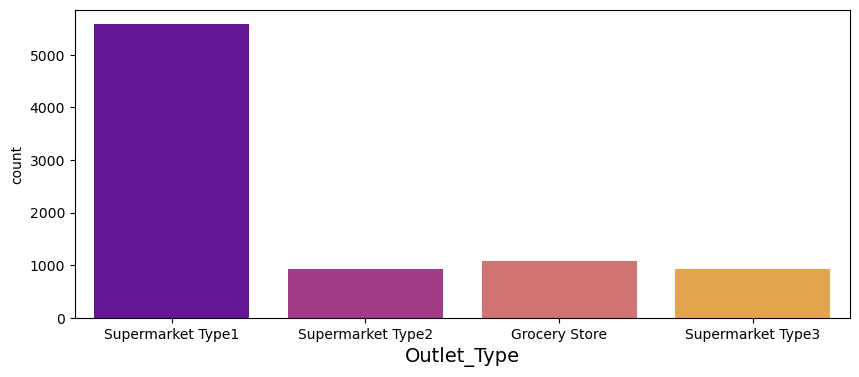

In [21]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Outlet_Type', data=train, palette='plasma')  # Change 'plasma' to your desired palette
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

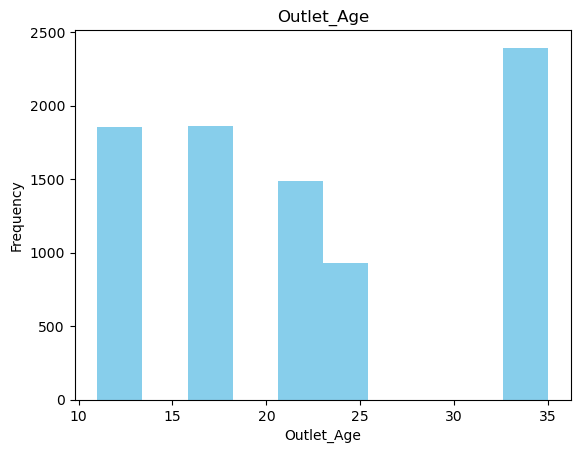

In [22]:
# Assuming 'Outlet_Age' is a numeric column in your DataFrame
plt.hist(train['Outlet_Age'], color='skyblue')  # Change 'skyblue' to your desired color
plt.title("Outlet_Age")
plt.xlabel("Outlet_Age")
plt.ylabel("Frequency")
plt.show()

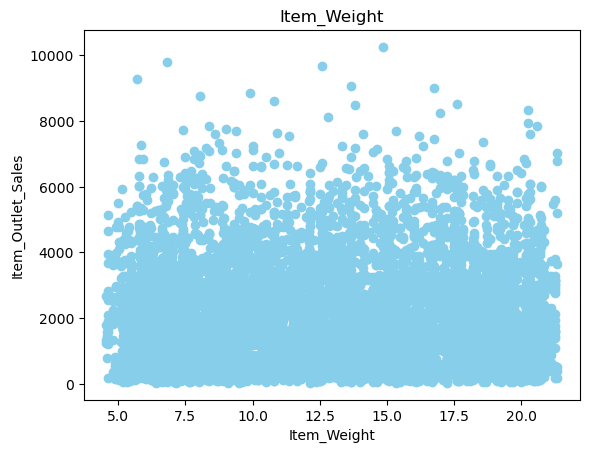

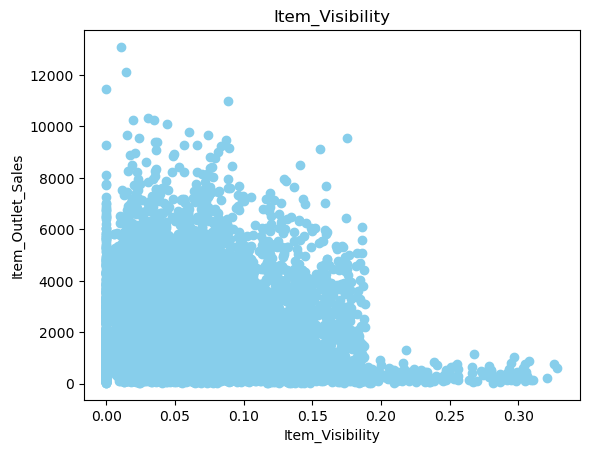

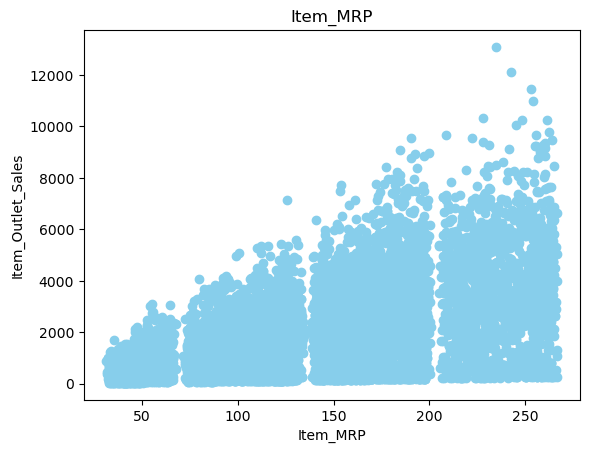

In [23]:
# Assuming 'Item_Outlet_Sales', 'Item_Weight', and 'Item_Visibility' are numeric columns in your DataFrame
for numeric in ['Item_Weight', 'Item_Visibility', 'Item_MRP']:  # Using the first three numeric columns for illustration
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'], c='skyblue')  # Change 'green' to your desired color
    plt.title(numeric)
    plt.xlabel(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

### Bivariate Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


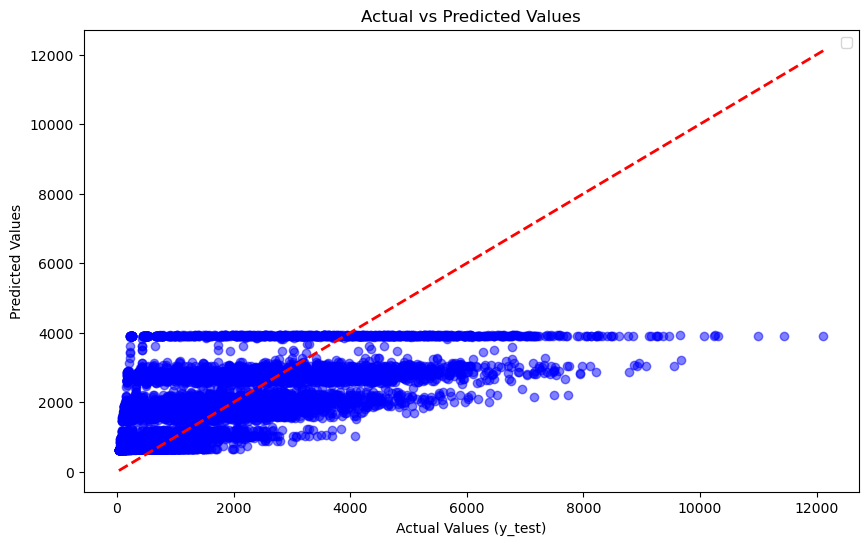

In [63]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


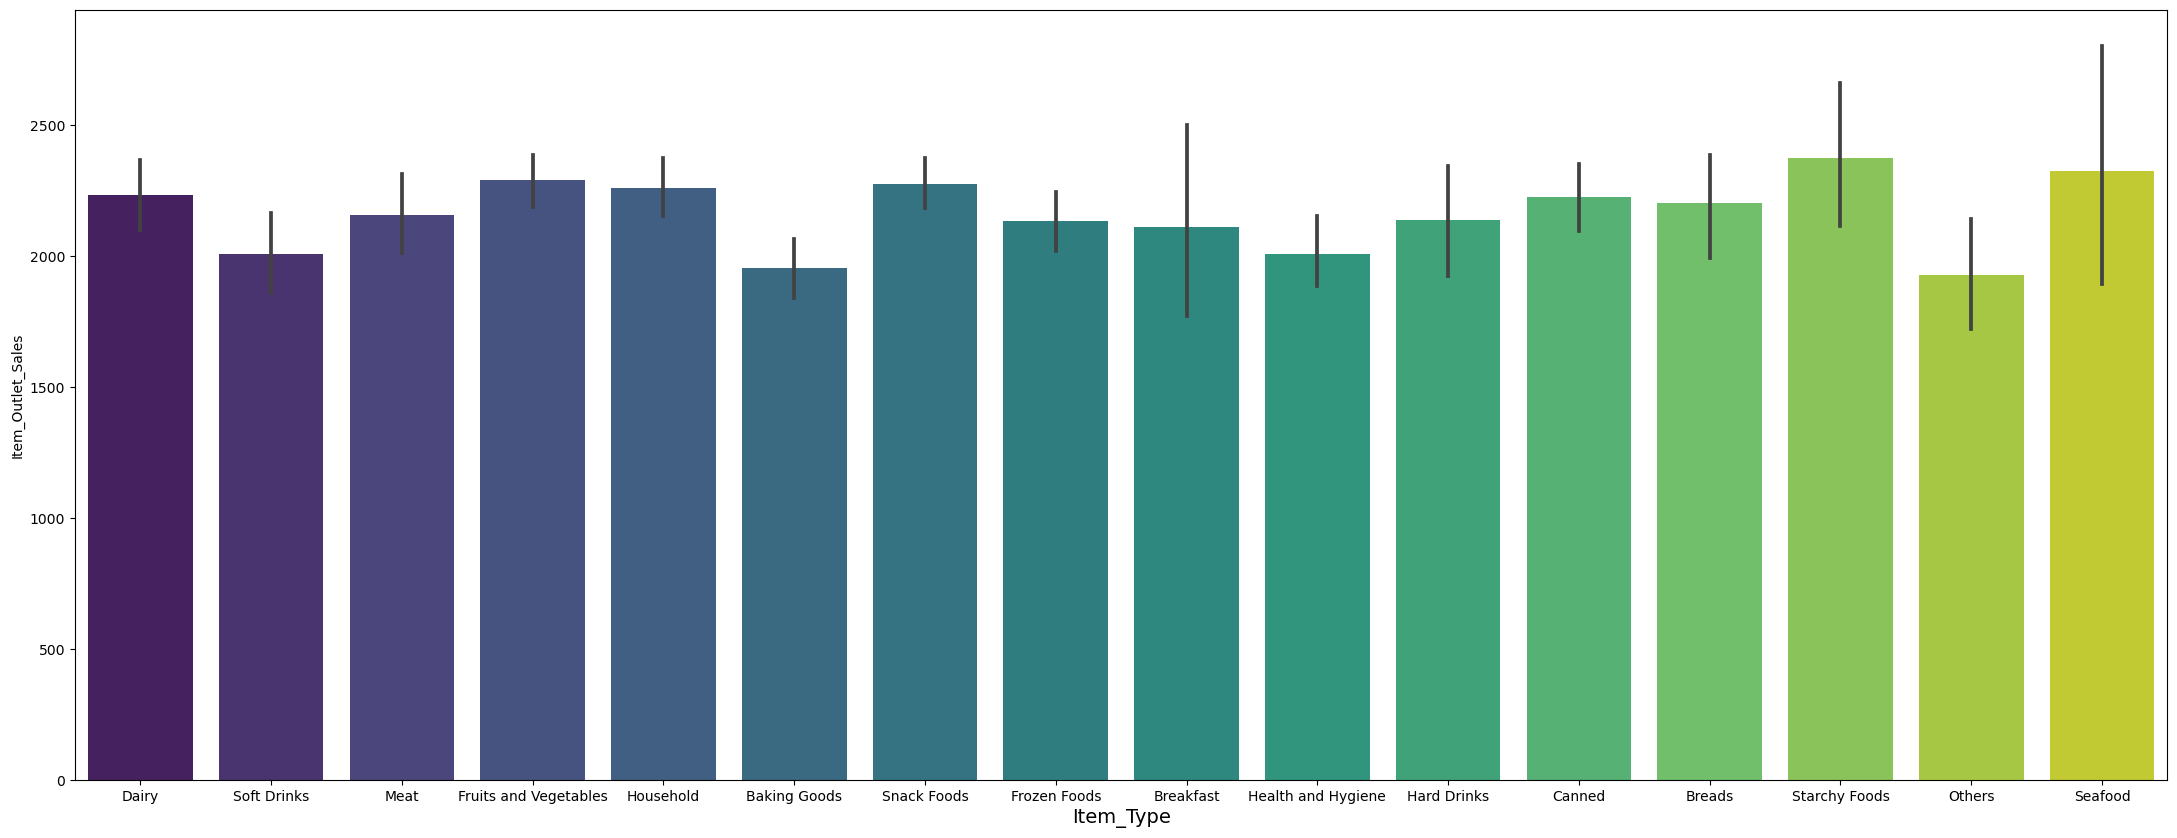

In [25]:
plt.figure(figsize=(27, 10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette='viridis')  # Change 'viridis' to your desired palette
plt.xlabel('Item_Type', fontsize=14)
plt.show()

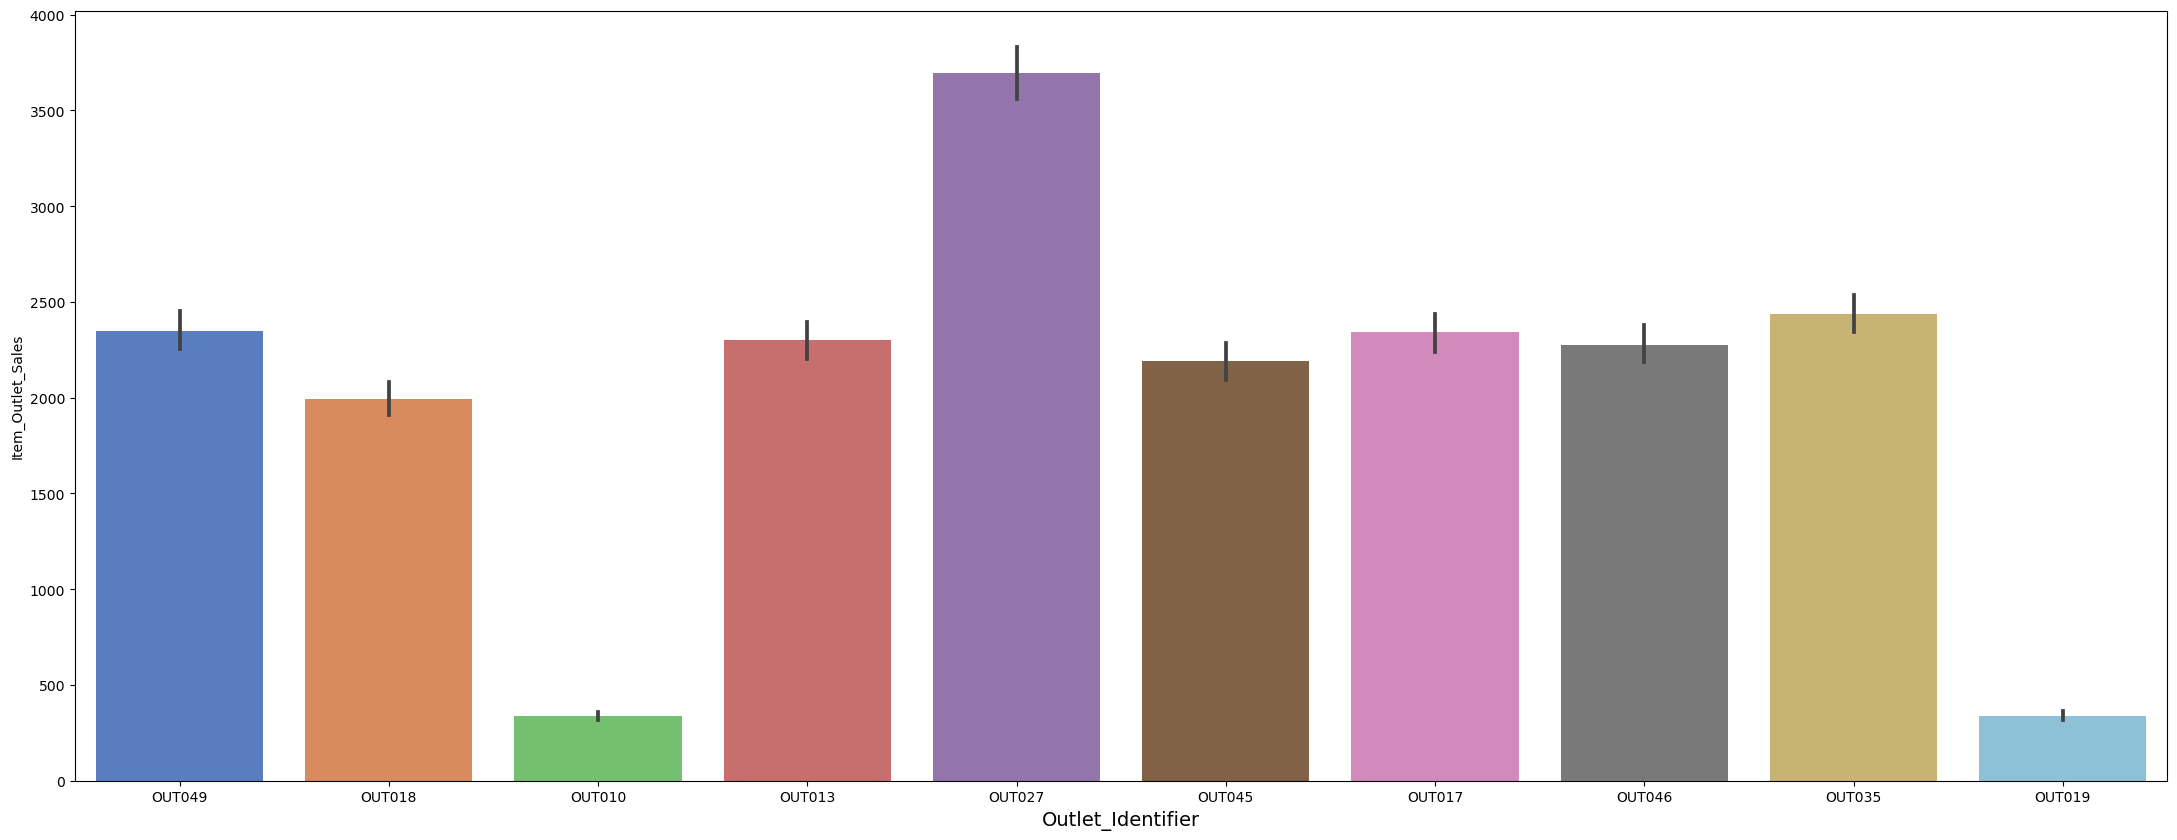

In [26]:
plt.figure(figsize=(27, 10))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train, palette='muted')  # Change 'muted' to your desired palette
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

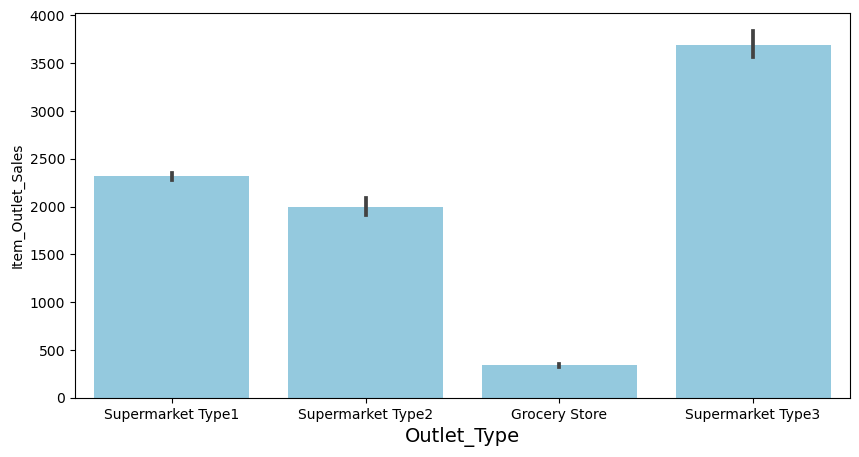

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, color='skyblue')  # Change 'skyblue' to your desired color
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

#### Missing value treatment

In [36]:
#train
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].dropna().mean())
#test
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].dropna().mean())
#checking if we filled missing values
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

In [37]:
print("train:\n")
print(train.info())
print("\n\ntest:\n")
print(test.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memor

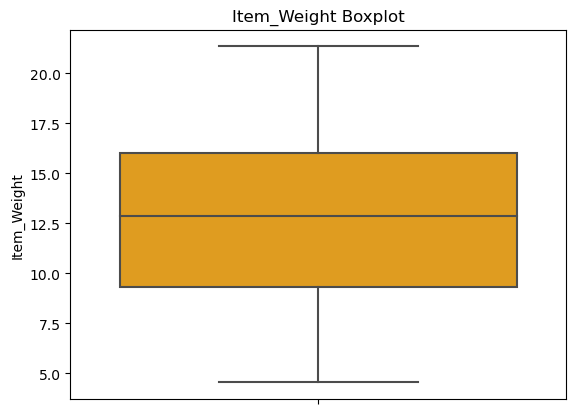

In [38]:
sns.boxplot(y=train['Item_Weight'], color='orange')  # Change 'orange' to your desired color
plt.title("Item_Weight Boxplot")
plt.show()

### Feature Engineering

In [39]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

### Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'train' is your DataFrame
Label = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
le = LabelEncoder()
for i in Label:
 train[i] = le.fit_transform(train[i])
 test[i] = le.fit_transform(test[i])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


### One hot encoding

In [41]:
cols = ['Item_Type', 'Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.transform(test[cols])).astype('int64') # Use transform instead of fit_trans

# Get feature columns
train_oh.columns = OH_encoder.get_feature_names_out(cols)
test_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
train_oh.index = train.index
test_oh.index = test.index

# Add one-hot encoded columns to our main df, new name: train_fe, test_fe (means feature engineered)
train_fe = pd.concat([train, train_oh], axis=1)
test_fe = pd.concat([test, test_oh], axis=1)

C:\Users\MD.IRSHAD\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Preprocessing data

In [42]:
train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [44]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
from sklearn.model_selection import train_test_split
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score as CVS

In [46]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

### Linear Regression

In [47]:
def cross_val(model_name, model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i, 2))
    print(f'Average {model_name} score: {round(scores.mean(), 4)}')

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Model
LR = LinearRegression()

# Fit
LR.fit(X_train, y_train)

# Predict
y_predict = LR.predict(X_test)

# Evaluation Metrics
LR_MAE = mean_absolute_error(y_test, y_predict)
LR_MSE = mean_squared_error(y_test, y_predict)
LR_R2 = r2_score(y_test, y_predict)
LR_CS = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {round(LR_MAE, 2)}")
print(f" Mean Squared Error: {round(LR_MSE, 2)}")
print(f" R^2 Score: {round(LR_R2, 4)}")

# Cross-Validation
cv_scores = cross_val_score(LR, X, y, cv=5)
average_cv_score = cv_scores.mean()
print(f"\n Cross-Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f" Fold {i}: {round(score, 2)}")
print(f"\n Average Cross-Validation Score: {round(average_cv_score, 4)}")

 Mean Absolute Error: 838.19
 Mean Squared Error: 1285793.54
 R^2 Score: 0.5593

 Cross-Validation Scores:
 Fold 1: 0.57
 Fold 2: 0.55
 Fold 3: 0.55
 Fold 4: 0.56
 Fold 5: 0.56

 Average Cross-Validation Score: 0.558


In [49]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")
Linear_Regression

,y_test,prediction
4931,1426.1436,2680.270940
4148,1201.7690,2521.511879
7423,1836.2764,2260.187885
4836,2410.8618,2300.373842
944,1549.9824,3067.836528
...,...,...
5517,4146.6024,3577.999366
7820,649.8208,1276.625357
3406,2050.6640,1730.899574
6538,1149.8366,1421.530443


### Regularized Linear Regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# Create a Lasso model
LS = Lasso(alpha=0.05)
# Fit the model to the training data
LS.fit(X_train, y_train)
# Make predictions on the test set
y_predict = LS.predict(X_test)
# Calculate evaluation metrics
LS_MAE = round(mean_absolute_error(y_test, y_predict), 2)
LS_MSE = round(mean_squared_error(y_test, y_predict), 2)
LS_R2 = round(r2_score(y_test, y_predict), 4)
# Print the evaluation metrics
print(f"Mean Absolute Error: {LS_MAE}")
print(f"Mean Squared Error: {LS_MSE}")
print(f"R^2 Score: {LS_R2}")
# Cross-validation
LS_CS = round(cross_val_score(LS, X, y, cv=5).mean(), 4)
print(f"Cross-validated Score: {LS_CS}")

Mean Absolute Error: 838.07
Mean Squared Error: 1285554.86
R^2 Score: 0.5594
Cross-validated Score: 0.5581


In [51]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv") 
Lasso_Regressor

,y_test,prediction
4931,1426.1436,2680.115924
4148,1201.7690,2519.840376
7423,1836.2764,2258.189982
4836,2410.8618,2299.363790
944,1549.9824,3068.155181
...,...,...
5517,4146.6024,3580.097853
7820,649.8208,1279.950796
3406,2050.6640,1727.818536
6538,1149.8366,1421.195486


### Random Forest

In [55]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)
#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS = round(CVS(RFR, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5477


In [58]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv") 
Random_Forest_Regressor

,y_test,prediction
4931,1426.1436,2184.427420
4148,1201.7690,991.948017
7423,1836.2764,2081.779583
4836,2410.8618,2153.559479
944,1549.9824,3052.300058
...,...,...
5517,4146.6024,3913.318355
7820,649.8208,1027.381321
3406,2050.6640,1634.501043
6538,1149.8366,1596.433725


In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
import xgboost as xgb
# Create an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5)
# Fit the model to the training data
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
# Calculate evaluation metrics
xgb_MSE = round(mean_squared_error(y_test, y_pred_xgb), 2)
xgb_MAE = round(mean_absolute_error(y_test, y_pred_xgb), 2)
xgb_R2 = round(r2_score(y_test, y_pred_xgb), 4)
# Print the evaluation metrics
print(f"Mean Squared Error (XGBoost): {xgb_MSE}")
print(f"Mean Absolute Error (XGBoost): {xgb_MAE}")
print(f"R^2 Score (XGBoost): {xgb_R2}")
# Cross-validation
xgb_CS = round(cross_val_score(xgb_model, X, y, cv=5).mean(), 4)
print(f"Cross-validated Score (XGBoost): {xgb_CS}")

Mean Squared Error (XGBoost): 1272350.95
Mean Absolute Error (XGBoost): 807.2
R^2 Score (XGBoost): 0.5639
Cross-validated Score (XGBoost): 0.5859


### summary

In [67]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,xgb_MSE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,xgb_MAE]
R2= [LR_R2,RFR_R_2,LS_R2,xgb_R2]
Cross_score= [LR_CS,RFR_CS,LS_CS,xgb_CS]
Models = pd.DataFrame({
 'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XGB Regressor"],
 'MAE': MAE, 'MSE': MSE, 'R^2':R2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,8.380700e+02,1.285555e+06,0.55940,0.5581
0,Linear Regression,8.381856e+02,1.285794e+06,0.55928,0.5580
1,Random Forest Regressor,1.030270e+03,1.964026e+06,0.32680,0.5920
3,XGB Regressor,1.272351e+06,8.072000e+02,0.56390,0.5859
